In [1]:
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error
from qiskit.ignis.experiments import QuantumVolumeExperiment

### initialize some parameters

In [2]:
qubit_lists = [[0, 1], [0, 1, 3, 5], [0, 1, 3, 5, 7]]
ntrials = 20
shots = 2048

### define the backend and noise

In [3]:
# define noise_model
noise_model = NoiseModel()
p1q = 0.002
p2q = 0.02
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2 * p1q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2q, 2), 'cx')

basis_gates = ['u2', 'u3', 'cx']
backend = QasmSimulator()

### run the experiment

In [4]:
qv_exp = QuantumVolumeExperiment(qubits=qubit_lists, trials=ntrials)
qv_exp.execute(backend, shots=shots, noise_model=noise_model, basis_gates=basis_gates)
res = qv_exp.run_analysis()
print(res.quantum_volume)

32


the result of the analysis is a QV result object. we can later extract data from it:

In [5]:
print(res)

Width/depth 2 greater than 2/3 (0.771582) with confidence 0.868137 (unsuccessful).
Width/depth 4 greater than 2/3 (0.823779) with confidence 0.967418 (unsuccessful).
Width/depth 5 greater than 2/3 (0.866187) with confidence 0.995615 (successful).



we can add more trials and execute again. only the new trials will be executed, and the whole data (old+new) will be analysed:

In [6]:
qv_exp.add_data(5)
qv_exp.execute(backend, shots=shots, noise_model=noise_model, basis_gates=basis_gates)
new_res = qv_exp.run_analysis()
print(new_res)

Width/depth 2 greater than 2/3 (0.777324) with confidence 0.908222 (unsuccessful).
Width/depth 4 greater than 2/3 (0.821504) with confidence 0.978399 (successful).
Width/depth 5 greater than 2/3 (0.863398) with confidence 0.997910 (successful).



the result object also able to plot the data

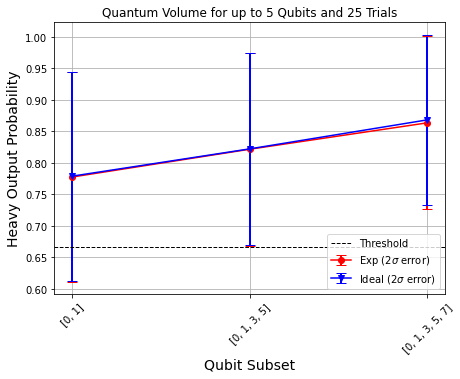

In [7]:
new_res.plot_qv_data()